In [1]:
# Imports needed for the script
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Loading the data
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_dataframe = pd.DataFrame(iris.data)
iris_dataframe.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#Converting the Datasets into Dataframe
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Changing the columns names
data1.columns = ["sl", "sw", 'pl', 'pw','targets']
data1.head()

,sl,sw,pl,pw,targets
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
print(iris_dataframe.shape)

(150, 4)


In [8]:
iris_dataframe.columns = iris.feature_names
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


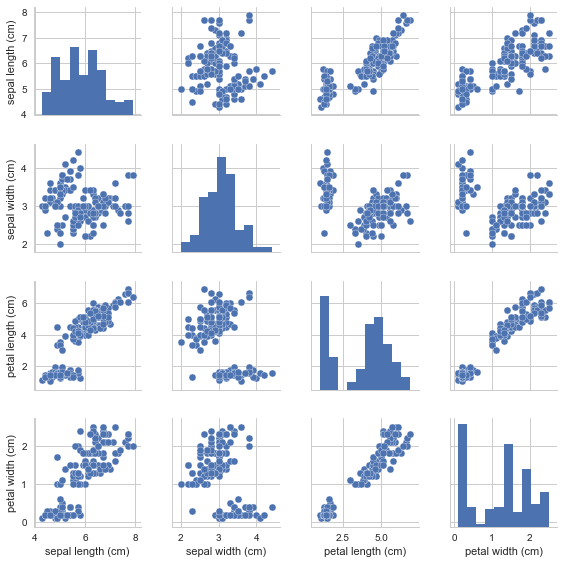

In [9]:
#Graphical representation
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = iris.feature_names

sns.pairplot(iris_dataframe[features_plot], size=2.0);
plt.tight_layout()
plt.show()

In [10]:
#Function to find label for a value
#if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label a
#if (m + Mean_Value) <=val < Mean_Value then it is assigned label b
#if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label c
#if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label d

def label(val, *boundaries):
    if (val < boundaries[0]):
        return 'a'
    elif (val < boundaries[1]):
        return 'b'
    elif (val < boundaries[2]):
        return 'c'
    else:
        return 'd'

#Function to convert a continuous data into labelled data
#There are 4 lables  - a, b, c, d
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

In [11]:
#Convert all columns to labelled data
data1['sl_labeled'] = toLabel(data1, 'sl')
data1['sw_labeled'] = toLabel(data1, 'sw')
data1['pl_labeled'] = toLabel(data1, 'pl')
data1['pw_labeled'] = toLabel(data1, 'pw')

In [12]:
#Deleting the unlabeled data
data1.drop(['sl','sw','pl','pw'], axis = 1,inplace=True)

In [13]:
data1.head()

,targets,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,0.0,b,c,a,a
1,0.0,a,b,a,a
2,0.0,a,c,a,a
3,0.0,a,c,a,a
4,0.0,a,c,a,a


In [14]:
#Importing the math library for log2
import math as mt

# Entropy

In [15]:
#Calculating the Entropy or Information Required
def entropy(df):
    #Check for distinct value of y or targets
    entropy_set=set(df['targets'])
    l1=list()
    total=df.shape[0]
    for val in entropy_set:
        #Getting only that dataframe which contains only the value as val in targets or y
        d=df[df['targets']==val].shape[0]/total
        l1.append(d)
    
    ent=0.0
    for i in l1:
        #Formula for entropy
         ent+=(-1*i*mt.log2(i))
    return ent   

In [16]:
#Example for entropy
ent=entropy(data1)
ent

1.584962500721156

# Information Gain

In [17]:
# Calculating Information gain
#df is DataFrame and f is required features to which we have to split
def info_gain(df,f):
    l1=set(df[f])
    total=df.shape[0]#total number of elements in df
    l2=list()
    
    for val in l1:
        #Getting only that dataframe which contains only the value as val in f
        d=df[df[f]==val]
        d_len=d.shape[0]
        #Calculating entropy for child node
        ent1=entropy(d)
        #Calculating weighted Entropy
        weighted_ent=(d_len/total)*ent1
        l2.append(weighted_ent)
    
    weighted_ent_all=sum(l2)
    ent_parent=entropy(df)
    
    #Formula for information gain
    info_gain=ent_parent-weighted_ent_all
    return info_gain
    

In [18]:
#Example for information gain
info_gain_eg=info_gain(data1,'sl_labeled')
info_gain_eg

0.5962670518211693

# Split Info

In [19]:
#Calculating the split info
#df is DataFrame and f is required features to which we have to split
def split_info(df,f):
    #Distinct numbers of elements in f
    l1=set(df[f])
    split=0.0
    total=len(df[f])
    for val in l1:
        #Getting only that dataframe which contains only the value as val in f
        d=df[df[f]==val]
        i=len(d[f])
        #Formula for split info
        split+=(-1*(i/total)*mt.log2(i/total))
    return split
    

In [20]:
#Example of split info
split_info_eg=split_info(data1,'sl_labeled')
split_info_eg

1.8878530076444087

# Gain Ratio

In [21]:
#Calculating the gain ratio
def gain_ratio(info_gain,split_gain):
    if split_gain==0:
        return 0
    elif info_gain==0:
        return 0
    else:
        #Formula for Gain ratio
        return info_gain/split_gain

In [22]:
gain_ratio_eg=gain_ratio(info_gain_eg,split_info_eg)
gain_ratio_eg

0.31584400342967844

# Build Decision Tree

In [23]:
def build_tree(df,unused_features,depth):
    
    #if target contain only one distnct elements
    if len(set(df['targets']))==1:
        print("Level",end=" ")
        print(depth)
        entropy_set=set(df['targets'])
        #Printing the Count of datapoints
        for e in entropy_set:
            print("Count of",end=" ")
            print(e,':',end=" ")
            print(df[df['targets']==e].shape[0])
        
        #Printing the other parameters
        print("Current Entropy is =",end=" ")
        print(entropy(df))
        print("Reached leaf node")
        print()
        return 
    
    #if unused features is empty 
    elif len(unused_features)==0:
        print("Level",end=" ")
        print(depth)
        entropy_set=set(df['targets'])
        #Printing the Count of datapoints
        for e in entropy_set:
            print("Count of",end=" ")
            print(e,':',end=" ")
            print(df[df['targets']==e].shape[0])
        #Printing the other parameters
        print("Current Entropy is =",end=" ")
        print(entropy(df))
        print("All unused features finished thus reached leaf node")
        print()
        return
    
    else:
            max_gain=0.0
            en=0.0
            best_feature=""
            inf=0.0
            for f in unused_features:
                    #Calling entropy for the feature
                    ent=entropy(df)
                    #Calling the information gain for the feature
                    info_gain_f=info_gain(df,f)
                    #Calling the split info for the feature
                    split_info_f=split_info(df,f)
                    #Calling the gain ratio for the feature
                    gain_ratio_f=gain_ratio(info_gain_f,split_info_f)
                    #Checking for max gain in among different features
                    if info_gain_f>inf:
                            max_gain=gain_ratio_f
                            best_feature=f
                            en=ent
            
            print("Level",end=" ")
            print(depth)
            print("Current Entropy is ",end=" ")
            print(en)
            #print("Splitting on feature",best_feature,"with gain ratio",max1)
            print("Splitting on feature",end=" ")
            print(best_feature)
            print("with gain ratio",end=" ")
            print(max_gain)
            
            bf_distinct=set(df[best_feature])
            entropy_set=set(df['targets'])
            #Printing the Count of datapoints
            for e in entropy_set:
                    print("Count of",end=" ")
                    print(e,':',end=" ")
                    print(df[df['targets']==e].shape[0])
            
            #Deleting the best feature from unused feature
            features_new=unused_features.drop(best_feature)
            
            for i in bf_distinct:  
                    #forming dataframe for best feature value equal to i
                    d1=df[df[best_feature]==i]
                    #Recursive call
                    build_tree(d1,features_new,depth+1)

In [24]:
#Creating the list of all features
unused_features=(data1.columns[1:])
#Calling the decision tree
build_tree(data1,unused_features,0)

Level 0
Current Entropy is  1.584962500721156
Splitting on feature pw_labeled
with gain ratio 0.6996382036222091
Count of 0.0 : 50
Count of 1.0 : 50
Count of 2.0 : 50
Level 1
Count of 1.0 : 10
Current Entropy is = 0.0
Reached leaf node

Level 1
Count of 0.0 : 50
Current Entropy is = 0.0
Reached leaf node

Level 1
Count of 2.0 : 34
Current Entropy is = 0.0
Reached leaf node

Level 1
Current Entropy is  0.863120568566631
Splitting on feature pl_labeled
with gain ratio 0.4334099495621067
Count of 1.0 : 40
Count of 2.0 : 16
Level 2
Count of 1.0 : 1
Current Entropy is = 0.0
Reached leaf node

Level 2
Count of 2.0 : 8
Current Entropy is = 0.0
Reached leaf node

Level 2
Current Entropy is  0.6581912658132185
Splitting on feature sw_labeled
with gain ratio 0.04553496474578601
Count of 1.0 : 39
Count of 2.0 : 8
Level 3
Current Entropy is  0.6962122601251458
Splitting on feature sl_labeled
with gain ratio 0.15234730495807186
Count of 1.0 : 26
Count of 2.0 : 6
Level 4
Count of 1.0 : 12
Current En

In [25]:
#Creating the dataframe of OR gate to check for proper working of Decision tree
test_data3=[['True','True','True'],['True','False','True'],['False','True','True'],['False','False','False']]

In [26]:
#Assign column names
data2=pd.DataFrame(test_data3,columns=['X1','X2','targets'])

In [27]:
data2

,X1,X2,targets
0,True,True,True
1,True,False,True
2,False,True,True
3,False,False,False


In [28]:
#Example for entropy
ent_eg_new=entropy(data2)
ent_eg_new

0.8112781244591328

In [29]:
#Example for information gain
info_gain_new=info_gain(data2,'X1')
info_gain_new

0.31127812445913283

In [30]:
#Example for split info
split_info_new=split_info(data2,'X1')
split_info_new

1.0

In [31]:
#Example for gain ratio
gain_ratio_new=gain_ratio(info_gain_new,split_info_new)
gain_ratio_new

0.31127812445913283

In [32]:
#Creating the list of all features
feature_new=data2.columns[:-1]
#Decision Tree for OR
build_tree(data2,feature_new,0)

Level 0
Current Entropy is  0.8112781244591328
Splitting on feature X2
with gain ratio 0.31127812445913283
Count of False : 1
Count of True : 3
Level 1
Current Entropy is  1.0
Splitting on feature X1
with gain ratio 1.0
Count of False : 1
Count of True : 1
Level 2
Count of False : 1
Current Entropy is = 0.0
Reached leaf node

Level 2
Count of True : 1
Current Entropy is = 0.0
Reached leaf node

Level 1
Count of True : 2
Current Entropy is = 0.0
Reached leaf node

